<a href="https://colab.research.google.com/github/SharonEstivalez/FisicaComputacional1/blob/master/Actividad4_Sharon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***$$ACTIVIDAD  \space 4$$***



Pacheco Rodriguez Sharon Estivalez

 03/ 02/ 21
 




In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [58]:

#Tomar url en raw
url = 'https://raw.githubusercontent.com/SharonEstivalez/FisicaComputacional1/master/Actividad%203/10090.txt'

#Nombres para las columnas
col =  ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin'] 

# encoding='cp1251' Windows (Europa Occidental)
# sep='\s+' el separador de datos es de uno o más espacios
#header=None no hay encabezado
#skiprows=19 Se brincará los primeros 19 renglones 
#skipfooter=1 Se brincará el último renglón
#engine='python' Se procesan los datos utilizando Python 
df_act = pd.read_csv(url, names=col, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacer una copia del DataFrame
df_sp0 = df_act.copy()

#Reemplazar "Nulo" por espacio en blanco
str_Nulo = 'Nulo'
df_sp1 = df_sp0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertir las valores de Precip, Evap, Tmax y Tmin en flotantes
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_sp1[cols] = pd.to_numeric(df_sp1[cols], errors='coerce')

  #Hacer copia del DataFrame anterior para trabajar con ella

df_sp2 = df_sp1.copy()

#Tomar "Fecha" y convertirlo al formato fecha que entiende python
df_sp2['Fecha'] = pd.to_datetime(df_sp2['Fecha'], dayfirst=True).copy()

#Añadir dos columnas, año y fecha

df_sp2['Año'] = df_sp2['Fecha'].dt.year
df_sp2['Mes'] = df_sp2['Fecha'].dt.month


#Nueva copia para este trabajo
df_dm = df_sp2.copy()
df_dm.info()
print(df_dm.head())
print(df_dm.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19592 entries, 0 to 19591
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   19592 non-null  datetime64[ns]
 1   Precip  19558 non-null  float64       
 2   Evap    17688 non-null  float64       
 3   Tmax    19484 non-null  float64       
 4   Tmin    19487 non-null  float64       
 5   Año     19592 non-null  int64         
 6   Mes     19592 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.0 MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1963-08-01     0.0   3.6  28.0  10.0  1963    8
1 1963-08-02     0.0   4.8  21.0  11.0  1963    8
2 1963-08-03     0.0   4.5  25.0  10.0  1963    8
3 1963-08-04     0.0   4.0  18.0  11.0  1963    8
4 1963-08-05     9.0   2.5  24.5  12.0  1963    8
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
19587 2018-12-27     0.0   NaN  22.0   2.0  2018   12
19588 2018-12-28   

# **Mes**
De entero a variable categórica (Jan, Feb,...)

In [59]:
#Eliminar columna "Mes" y crear una nueva con lo mencionado arriba
df_dm.drop('Mes', axis=1, inplace=True)
df_dm['Mes'] = df_dm['Fecha'].dt.strftime('%b')
df_dm.info()
print(df_dm.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19592 entries, 0 to 19591
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   19592 non-null  datetime64[ns]
 1   Precip  19558 non-null  float64       
 2   Evap    17688 non-null  float64       
 3   Tmax    19484 non-null  float64       
 4   Tmin    19487 non-null  float64       
 5   Año     19592 non-null  int64         
 6   Mes     19592 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1963-08-01     0.0   3.6  28.0  10.0  1963  Aug
1 1963-08-02     0.0   4.8  21.0  11.0  1963  Aug
2 1963-08-03     0.0   4.5  25.0  10.0  1963  Aug
3 1963-08-04     0.0   4.0  18.0  11.0  1963  Aug
4 1963-08-05     9.0   2.5  24.5  12.0  1963  Aug


# **Precipitación**

# **Uso de Matplotlib**

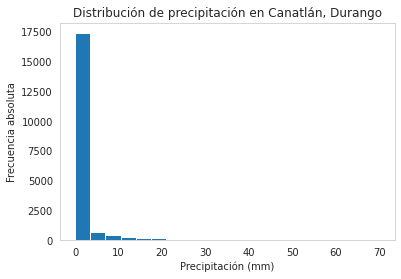

In [60]:
#Histograma
plt.hist(df_dm.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribución de precipitación en Canatlán, Durango')
plt.grid()
plt.show()


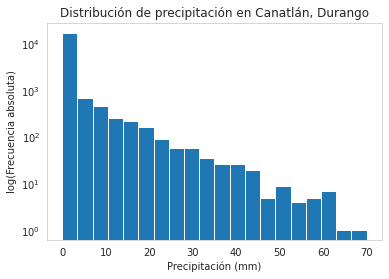

In [61]:
#Ahora usando la escala logarítimica en el eje "y"
plt.hist(df_dm.Precip, bins=20)
plt.yscale('log')
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frecuencia absoluta)')
plt.title('Distribución de precipitación en Canatlán, Durango')
plt.grid()
plt.show()

# **Uso de Seaborn**

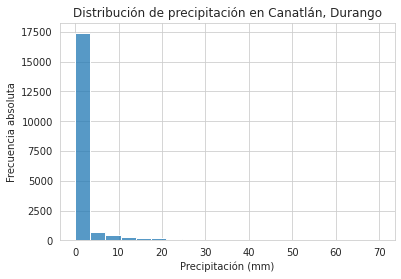

In [62]:
#Primer gráfica con Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribución de precipitación en Canatlán, Durango')
sns.histplot(data=df_dm, x='Precip', bins=20);


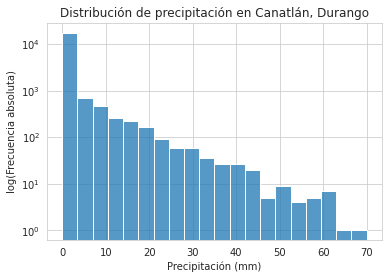

In [63]:
#Segunda gráfica (escala logarítmica para y) con Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frecuencia absoluta)')
plt.title('Distribución de precipitación en Canatlán, Durango')
sns.histplot(data=df_dm, x='Precip', bins=20, log_scale=(False,True));


# **Temperaturas máximas y mínimas**

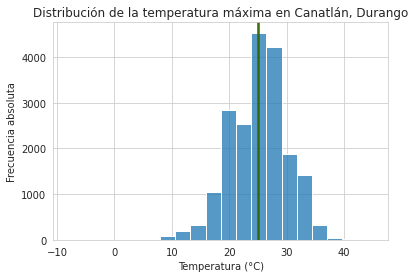

In [64]:
#Gráfica temperatura máxima
sns.set_style("whitegrid")


#Definir promedio y mediana
Tmed = df_dm.Tmax.median()
Tprom = df_dm.Tmax.mean()

sns.histplot(data=df_dm, x='Tmax', bins=20);


#Poner líneas verticales en la mediana y promedio
plt.axvline(x = Tmed, color = 'r', label = 'm')
plt.axvline(x = Tprom, color = 'g', label = 'x')

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribución de la temperatura máxima en Canatlán, Durango')

plt.show()

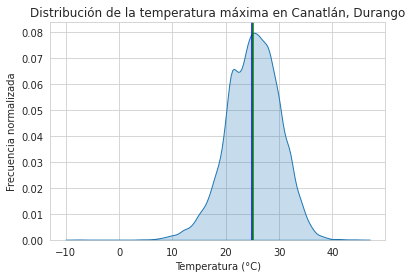

In [65]:
#Gráfica de la función de densidad de probabilidad
sns.set_style("whitegrid")

sns.kdeplot(df_dm.Tmax, fill=True);
plt.axvline(Tmed, color = 'b');
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la temperatura máxima en Canatlán, Durango')

plt.show()

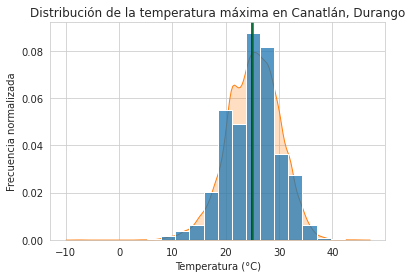

In [66]:
#Sobreponer ambas gráficas
sns.set_style("whitegrid")

sns.histplot(data=df_dm, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_dm.Tmax, fill=True);

plt.axvline(Tmed, color = 'b');
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la temperatura máxima en Canatlán, Durango')

plt.show()

<function matplotlib.pyplot.show>

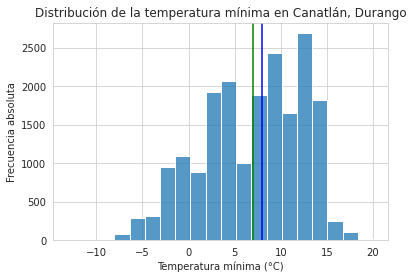

In [67]:
#Gráfica de la temperatura mínima
sns.set_style("whitegrid")

#Definir promedio y mediana
Tmed = df_dm.Tmin.median()
Tprom = df_dm.Tmin.mean()

sns.histplot(data=df_dm, x='Tmin', bins=20);
plt.axvline(Tmed, color = 'b');
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura mínima (°C)')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribución de la temperatura mínima en Canatlán, Durango')

plt.show


In [68]:
print(Tmed)
print(Tprom)

8.0
6.953404833991892


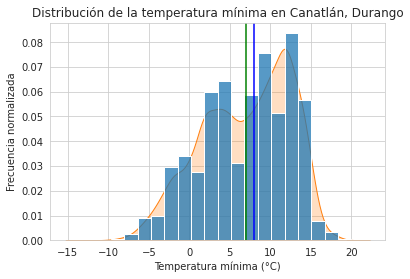

In [69]:
#Gráfica de la función de densidad de probabilidad y de temperatura mínima
sns.set_style("whitegrid")

#Definir promedio y mediana
Tmed = df_dm.Tmin.median()
Tprom = df_dm.Tmin.mean()

sns.histplot(data=df_dm, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_dm.Tmin, fill=True);

plt.axvline(Tmed, color = 'b');
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura mínima (°C)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la temperatura mínima en Canatlán, Durango')
plt.show()

# **Gráficas de cajas**

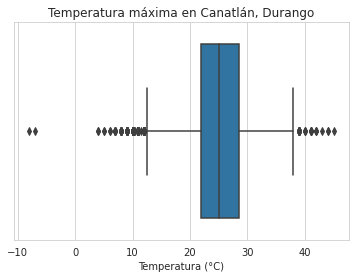

In [70]:
#Gráfica de cajas con Seaborn (Temperatura máxima)
sns.set_style("whitegrid")

sns.boxplot(x=df_dm.Tmax, data=df_dm, orient='h').set(xlabel='Temperatura (°C)',
                                                      title='Temperatura máxima en Canatlán, Durango');

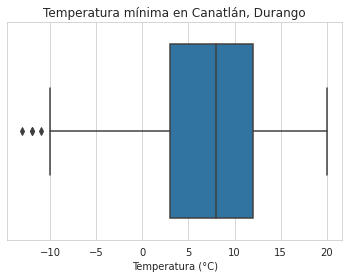

In [71]:
#Gráfica de cajas con Seaborn (Temperatura mínima)
sns.set_style("whitegrid")

sns.boxplot(x=df_dm.Tmin, data=df_dm, orient='h').set(xlabel='Temperatura (°C)', 
                                                      title='Temperatura mínima en Canatlán, Durango');

# **Evaporación**

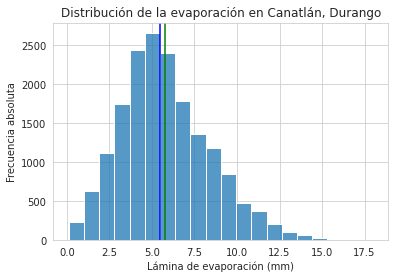

In [72]:
#Gráfica evaporación
sns.set_style("whitegrid")

#Definir promedio y mediana
Eva_med = df_dm.Evap.median()
Eva_prom = df_dm.Evap.mean()

sns.histplot(data=df_dm, x='Evap', bins=20);


#Líneas verticales para mediana y promedio
plt.axvline(x = Eva_med, color = 'b', label= 'm')
plt.axvline(x = Eva_prom, color = 'g', label = 'x')

plt.xlabel('Lámina de evaporación (mm)')
plt.ylabel('Frecuencia absoluta')
plt.title('Distribución de la evaporación en Canatlán, Durango')

plt.show()

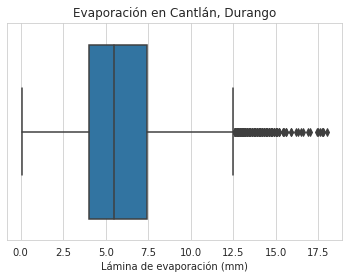

In [73]:
#Gráfica de Cajas con Seaborn 
sns.set_style("whitegrid")

sns.boxplot(x=df_dm.Evap, data=df_dm, orient='h').set(xlabel='Lámina de evaporación (mm)',
                                                      title='Evaporación en Cantlán, Durango');

# **Períodos de datos**

In [74]:
#Hacer períodos de 30 años aprox
#1963-2018
df_63 = df_dm[(df_dm['Año'] >= 1963) & (df_dm['Año'] < 1988)]
df_88 = df_dm[(df_dm['Año'] >= 1988) & (df_dm['Año'] < 2018)]

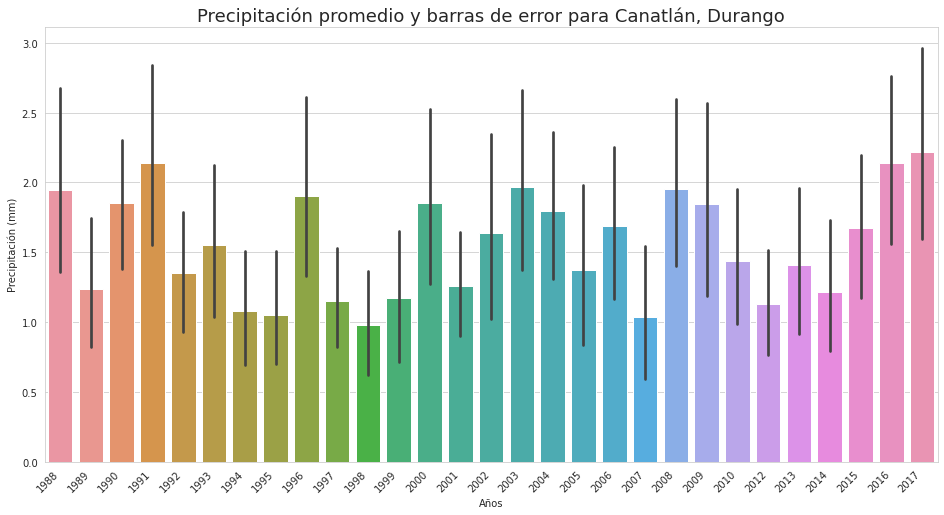

In [75]:
#Gráfica de precipitación de los últimos 30 años, por año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

s=sns.barplot(x='Año', y='Precip', data=df_88);

#Rotar 45° los años en el eje horizontal 
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error para Canatlán, Durango', fontsize=18)

plt.show()

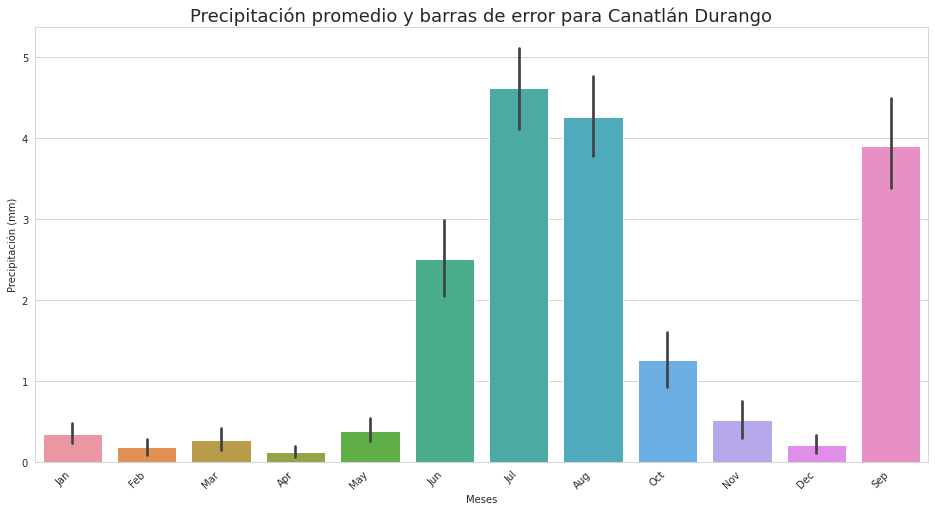

In [76]:
#Gráfica de precipitación de los últimos 30 años, por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

s=sns.barplot(x='Mes', y='Precip', data=df_88);
#Rotar 45° los meses en el eje x
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error para Canatlán Durango', fontsize=18)

plt.show()

# **Gráfica de datos con líneas**

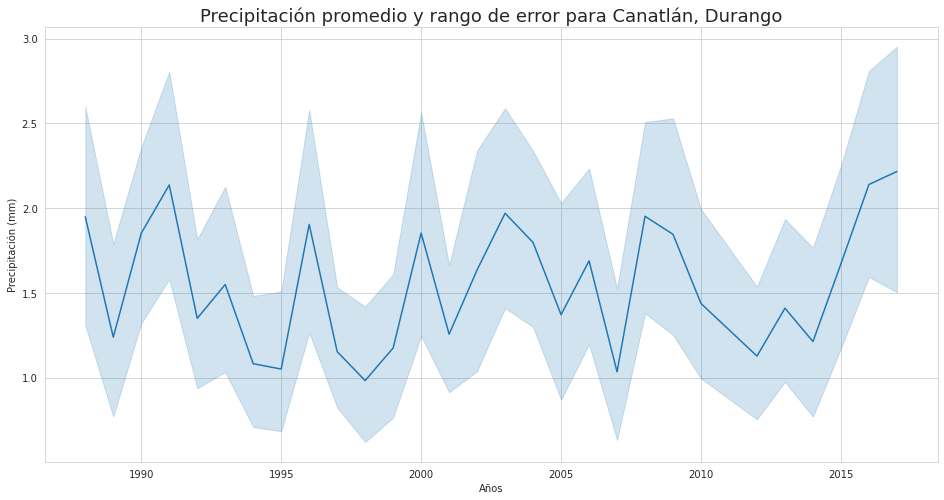

In [77]:
#Gráfica de precipitación de los últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

s=sns.lineplot(x='Año', y='Precip', data=df_88);

#Rotar 45° los años del eje x
#s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y rango de error para Canatlán, Durango', fontsize=18)
plt.show()

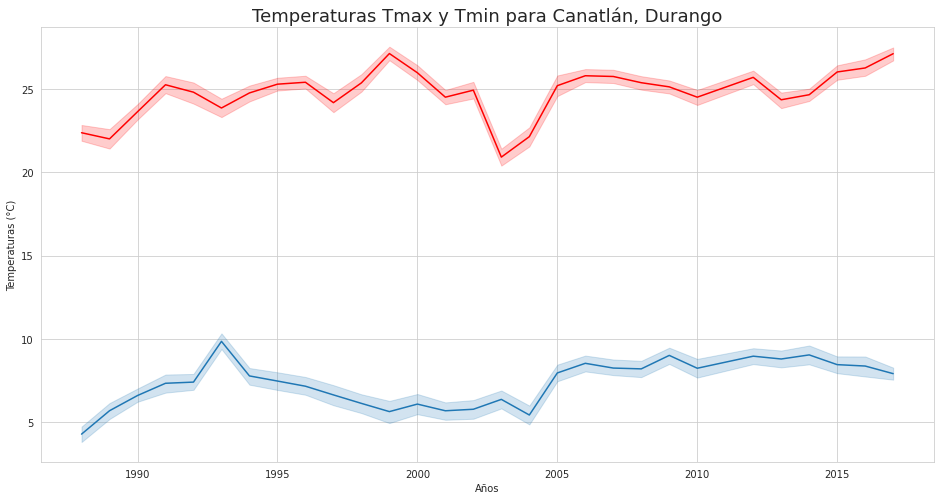

In [78]:
# Gráfica de temperaturas de últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_88, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_88);

plt.xlabel('Años')
plt.ylabel('Temperaturas (°C)')
plt.title('Temperaturas Tmax y Tmin para Canatlán, Durango', fontsize=18)

plt.show()


# **Gráficas de caja por mes**

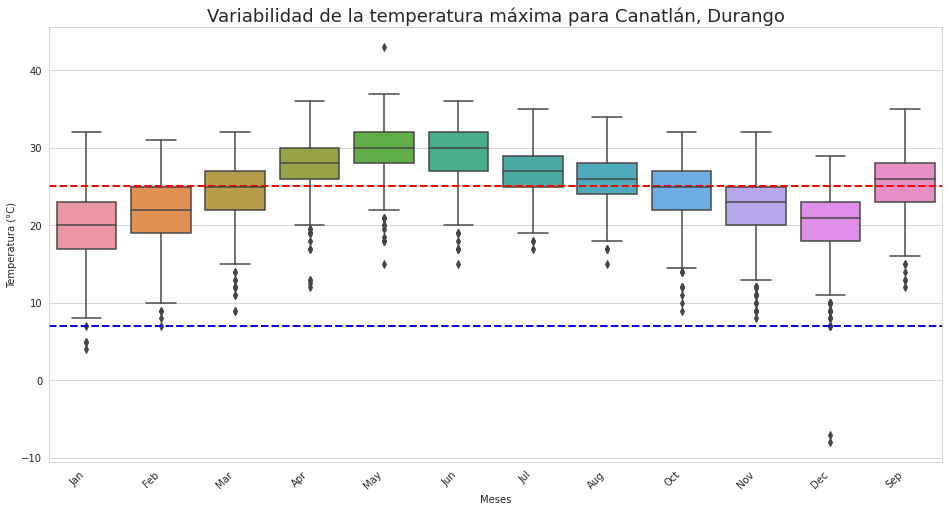

mean(Tmax) =  25.10798090741121
mean(Tmin) =  6.953404833991892
Dif Tmax_b-Tmin_b =  18.154576073419317


In [79]:
#Gráfica de temperaturas máximas en los últimos 30 años, por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

#Promedio de Tmax y Tmin
Tmax_b = df_dm.Tmax.mean()
Tmin_b = df_dm.Tmin.mean()


#Gráfica de cajas de la Temperatura 
s=sns.boxplot(x='Mes', y='Tmax', data=df_88);


#Línea de Tmax promedio 
plt.axhline(Tmax_b, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_b, color = 'b', linestyle='--', linewidth=2);

#Rotar 45° el eje x
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la temperatura máxima para Canatlán, Durango', fontsize=18)

plt.show()

#Información de Temperaturas
print('mean(Tmax) = ', Tmax_b)
print('mean(Tmin) = ', Tmin_b)
print('Dif Tmax_b-Tmin_b = ', (Tmax_b - Tmin_b))


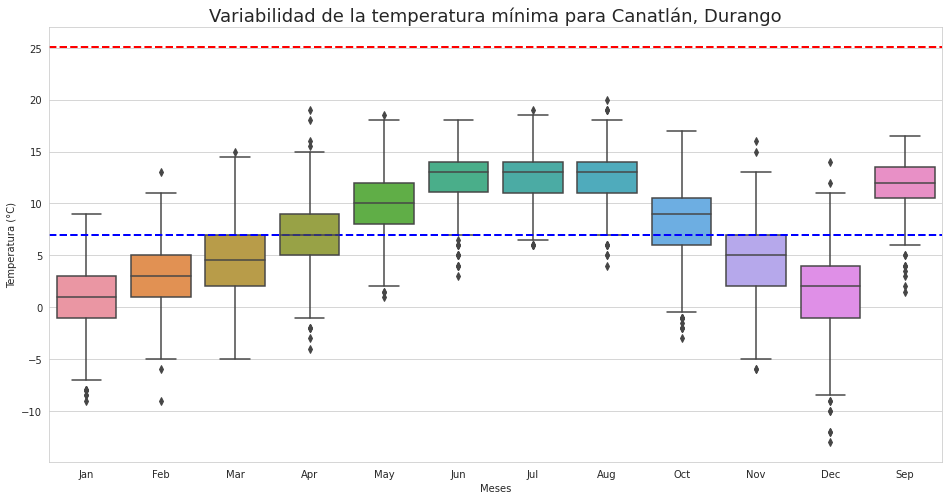

mean(Tmax) =  25.10798090741121
mean(Tmin) =  6.953404833991892
Dif Tmax_b-Tmin_b =  18.154576073419317


In [80]:
#Gráfica de temperaturas mínimas en los últimos 30 años, por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))


#Promedio de Tmax y Tmin
Tmax_b = df_dm.Tmax.mean()
Tmin_b = df_dm.Tmin.mean()


#Gráfica de cajas de la temperatura 
s=sns.boxplot(x='Mes', y='Tmin', data=df_88);
# Linea de Tmin promedio 
plt.axhline(Tmax_b, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_b, color = 'b', linestyle='--', linewidth=2);


#Rotar 45° eje x
#s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right');


plt.xlabel('Meses')
plt.ylabel('Temperatura (°C)')
plt.title('Variabilidad de la temperatura mínima para Canatlán, Durango', fontsize=18)

plt.show()


#Información de temperaturas
print('mean(Tmax) = ', Tmax_b)
print('mean(Tmin) = ', Tmin_b)
print('Dif Tmax_b-Tmin_b = ', (Tmax_b - Tmin_b))


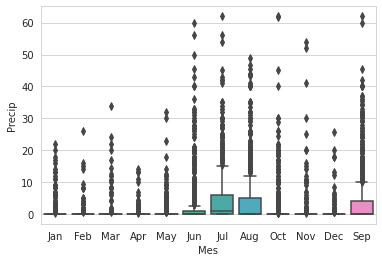

In [81]:
sns.boxplot(x='Mes' , y='Precip', data=df_88);